## Garbage Classification Data Preprocessing

Github : https://github.com/mohammedmahdiali

LinkedIn : https://www.linkedin.com/in/mohammed-mahdi-a15522231/

### تقسيم البيانات الى بيانات تدريب و اختبار

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import glob
import random
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
!unzip "./garbage_classification.zip"

Archive:  ./garbage_classification.zip
replace garbage_classification/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: garbage_classification/.DS_Store  
replace __MACOSX/garbage_classification/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/garbage_classification/._.DS_Store  
replace garbage_classification/paper/paper283.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: garbage_classification/paper/paper283.jpg  
  inflating: garbage_classification/paper/paper297.jpg  
  inflating: garbage_classification/paper/paper526.jpg  
  inflating: garbage_classification/paper/paper240.jpg  
  inflating: garbage_classification/paper/paper254.jpg  
  inflating: garbage_classification/paper/paper532.jpg  
  inflating: garbage_classification/paper/paper268.jpg  
  inflating: garbage_classification/paper/paper491.jpg  
  inflating: garbage_classification/paper/paper64.jpg  
  inflating: garbage_classification/paper/paper70.jpg  
  inflating: garbage

In [49]:
main_file = "garbage_classification"

files = []
for file in os.listdir(main_file):
  if not str(file).startswith("."):
    files.append(file)
  else:continue

# Data size
total_size = 0
for file in files:
    images = glob.glob(f"{main_file}/{file}/*.jpg")
    print(f"{file} : {len(images)}")
    total_size += len(images)
    
print(f"\nTOTAL : {total_size}")

trash : 137
cardboard : 403
paper : 594
glass : 501
metal : 410
plastic : 482

TOTAL : 2527


In [50]:
train_data = []
test_data = []
pred_data = []

for file in files:
    images = glob.glob(f"{main_file}/{file}/*.jpg")
    random.shuffle(images)
    pred_data.append(images[:10])
    train_data.append(images[10:int((len(images)-10)/2)])
    test_data.append(images[int((len(images)-10)/2):])
    
# nested list >> one-dimensional
train_data = [image for sublist in train_data for image in sublist]
test_data = [image for sublist in test_data for image in sublist]
pred_data = [image for sublist in pred_data for image in sublist]

print(f"train={len(train_data)}, test={len(test_data)}, pred={len(pred_data)}")
print(f"TOTAL : {len(train_data)+len(test_data)+len(pred_data)}")

set(train_data).intersection(test_data)

train=1172, test=1295, pred=60
TOTAL : 2527


set()

In [48]:
X_train = []
y_train = []

X_test = []
y_test = []

image_size = 100

labels = {
    "cardboard" : 0,
    "glass" : 1,
    "metal" : 2,
    "paper" : 3,
    "plastic" : 4,
    "trash" : 5
}

def get_y(image_path):
    for x, y in labels.items():
        if str(x) in image_path:
            return y
        else:continue
            
for image_path in train_data:
    image = cv2.imread(image_path)
    image_array = cv2.resize(image, (image_size, image_size))
    X_train.append(image)
    y_train.append(get_y(image_path))

for image_path in test_data:
    image = cv2.imread(image_path)
    image_array = cv2.resize(image, (image_size, image_size))
    X_test.append(image)
    y_test.append(get_y(image_path))


#### Check the images after re-sizing

Category : glass



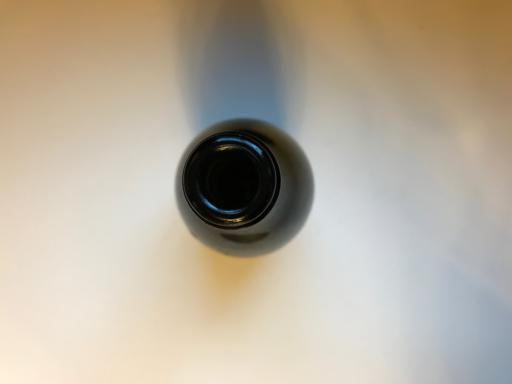

In [51]:
from google.colab.patches import cv2_imshow

key_list = list(labels.keys())
val_list = list(labels.values())

i = val_list.index(y_train[540])
print("Category : " + key_list[i] + "\n")

cv2_imshow(X_train[540])

#### Train DataFrame

In [52]:
train_df = pd.DataFrame({"image" : X_train, "label" : y_train})
train_df.head()

,image,label
0,"[[[210, 223, 239], [211, 224, 240], [211, 224,...",5
1,"[[[133, 151, 168], [133, 151, 168], [133, 151,...",5
2,"[[[207, 217, 234], [207, 217, 234], [207, 217,...",5
3,"[[[204, 216, 218], [204, 216, 218], [204, 216,...",5
4,"[[[198, 214, 226], [198, 214, 226], [198, 214,...",5


In [56]:
train_df["category"] = train_df["label"].apply(lambda x: key_list[val_list.index(x)])
train_df.tail()

,image,label,category
1167,"[[[224, 211, 209], [224, 211, 209], [224, 211,...",4,plastic
1168,"[[[185, 158, 148], [185, 158, 148], [185, 158,...",4,plastic
1169,"[[[209, 205, 204], [209, 205, 204], [209, 205,...",4,plastic
1170,"[[[216, 227, 241], [216, 227, 241], [216, 227,...",4,plastic
1171,"[[[227, 215, 215], [227, 215, 215], [227, 215,...",4,plastic


#### Test DataFrame

In [58]:
test_df = pd.DataFrame({"image" : X_test, "label" : y_test})
test_df.head()

,image,label
0,"[[[203, 216, 230], [203, 216, 230], [202, 215,...",5
1,"[[[218, 223, 232], [218, 223, 232], [218, 223,...",5
2,"[[[188, 196, 213], [188, 196, 213], [188, 196,...",5
3,"[[[199, 211, 229], [199, 211, 229], [199, 211,...",5
4,"[[[201, 203, 213], [201, 203, 213], [201, 203,...",5
